In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

import warnings
warnings.filterwarnings(action='ignore')

In [29]:
data = pd.read_csv('./ex2data2.txt', header = None)
# or data = pd.read_csv(path, header=None, names=['test1','test2','accepted'])
X = data.iloc[:,:-1]
y = data.iloc[:,2]
data

,0,1,2
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


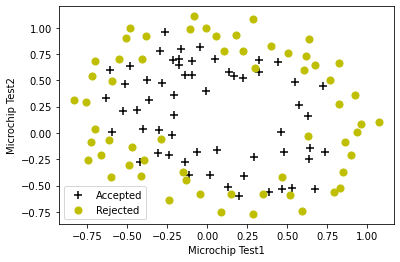

In [3]:
mask = y == 1
passed = plt.scatter(X[mask][0].values, X[mask][1].values, s=50, c='k', marker='+',)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values, s=50, c='y', marker='o',)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Accepted', 'Rejected'))
plt.show()

In [30]:
def mapFeature(X1, X2, degree):
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))[:,np.newaxis]))
    return out
degree = 6
X = mapFeature(X.iloc[:,0], X.iloc[:,1], degree)
X[0,:]

array([1.00000000e+00, 5.12670000e-02, 6.99560000e-01, 2.62830529e-03,
       3.58643425e-02, 4.89384194e-01, 1.34745327e-04, 1.83865725e-03,
       2.50892595e-02, 3.42353606e-01, 6.90798869e-06, 9.42624411e-05,
       1.28625106e-03, 1.75514423e-02, 2.39496889e-01, 3.54151856e-07,
       4.83255257e-06, 6.59422333e-05, 8.99809795e-04, 1.22782870e-02,
       1.67542444e-01, 1.81563032e-08, 2.47750473e-07, 3.38066048e-06,
       4.61305487e-05, 6.29470940e-04, 8.58939846e-03, 1.17205992e-01])

In [19]:
def sigmoid (x) : 
    return 1 / (1 + np.exp (-x))

In [20]:
#
# Hint :  X * theta ==> np.matmul(X, theta)  or X @ theta
#         Sum(y_i * log(hx)_i) ==> np.matmul(y.T, np.log(hx))  or y.T @ np.log(hx)
#
def lrCostFunction(theta, X, y, lmbda):
    # problem-1 (10) =================
    m = len(y)
    #J = (-1/m) * (y.T @ np.log(sigmoid(X @ theta)) + (1 - y.T) @ np.log(1 - sigmoid(X @ theta)))
    #reg = (lmbda/(2*m)) * (theta[1:].T @ theta[1:])
    #J = J + reg
    hx = np.matmul(X, theta)
    J = (-1/m) * np.matmul(y.T, np.log(sigmoid(hx)))
    J = J + (-1/m) * np.matmul((1-y.T),np.log(1-sigmoid(hx)))
    J = J + (lmbda/(2*m)) * np.matmul(theta[1:].T, theta[1:])
    #===============================
    return J

In [21]:
def lrGradientDescent(theta, X, y, lmbda):
    # Problrm-2 (10) ========================
    m = len(y)
    #grad = np.zeros([m,1])
    #grad = (1/m) * X.T @ (sigmoid(X @ theta) - y)
    hx = np.matmul(X,theta)
    grad = (1/m) * np.matmul(X.T, (sigmoid(hx) - y))
    grad[1:] = grad[1:] + (lmbda / m) * theta[1:]
    # ======================================
    return grad

In [22]:
(m, n) = X.shape
y = y[:, np.newaxis]
theta = np.zeros((n,1))
lmbda = 1.
J = lrCostFunction(theta, X, y, lmbda)
print(J)

[[[0.69314718]]]


In [23]:
output = opt.fmin_tnc(func = lrCostFunction, x0 = theta.flatten(), fprime = lrGradientDescent, \
                         args = (X, y.flatten(), lmbda))
theta = output[0]
print(theta) # theta contains the optimized values

[ 1.27271026  0.62529964  1.18111685 -2.01987399 -0.9174319  -1.43166928
  0.12393228 -0.36553118 -0.35725404 -0.17516291 -1.45817009 -0.05098418
 -0.61558556 -0.27469165 -1.19271298 -0.24217841 -0.20603301 -0.04466177
 -0.27778948 -0.29539513 -0.45645981 -1.04319154  0.02779373 -0.29244866
  0.01555759 -0.32742404 -0.1438915  -0.92467487]


In [24]:
pred = [sigmoid(np.dot(X, theta)) >= 0.5]
np.mean(pred == y.flatten()) * 100

83.05084745762711

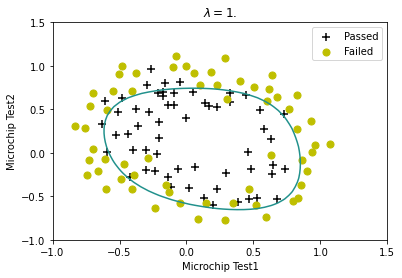

In [25]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

def mapFeatureForPlotting(X1, X2, degree):
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j], degree), theta)
        
mask = y.flatten() == 1
X = data.iloc[:,:-1]
passed = plt.scatter(X[mask][0].values, X[mask][1].values, s=50, c='k', marker='+',)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values, s=50, c='y', marker='o',)
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.title('$\lambda = 1$.')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

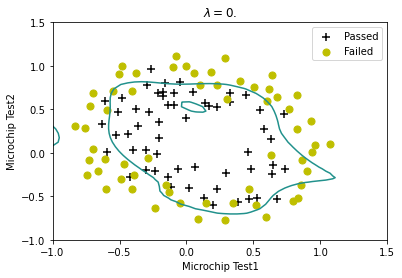

In [26]:
# Problem-3 (6)
degree = 6
X = mapFeature(X.iloc[:,0], X.iloc[:,1], degree)
theta = np.zeros((n,1))
lmbda = 0.
output = opt.fmin_tnc(func = lrCostFunction, x0 = theta.flatten(), fprime = lrGradientDescent, \
                         args = (X, y.flatten(), lmbda))
theta = output[0]

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j], degree), theta)
        
mask = y.flatten() == 1
X = data.iloc[:,:-1]
passed = plt.scatter(X[mask][0].values, X[mask][1].values, s=50, c='k', marker='+',)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values, s=50, c='y', marker='o',)
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.title('$\lambda = 0$.')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

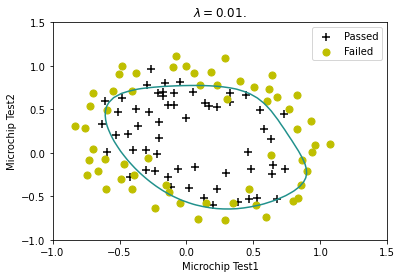

In [27]:
degree = 6
X = mapFeature(X.iloc[:,0], X.iloc[:,1], degree)
theta = np.zeros((n,1))
lmbda = 0.01
output = opt.fmin_tnc(func = lrCostFunction, x0 = theta.flatten(), fprime = lrGradientDescent, \
                         args = (X, y.flatten(), lmbda))
theta = output[0]

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j], degree), theta)
        
mask = y.flatten() == 1
X = data.iloc[:,:-1]
passed = plt.scatter(X[mask][0].values, X[mask][1].values, s=50, c='k', marker='+',)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values, s=50, c='y', marker='o',)
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.title('$\lambda = 0.01$.')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

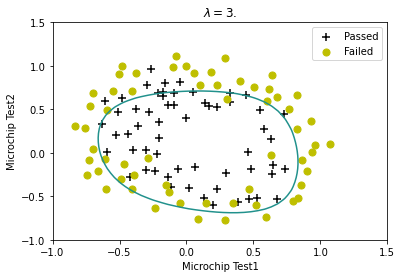

In [28]:
degree = 6
X = mapFeature(X.iloc[:,0], X.iloc[:,1], degree)
theta = np.zeros((n,1))
lmbda = 3.
output = opt.fmin_tnc(func = lrCostFunction, x0 = theta.flatten(), fprime = lrGradientDescent, \
                         args = (X, y.flatten(), lmbda))
theta = output[0]

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j], degree), theta)
        
mask = y.flatten() == 1
X = data.iloc[:,:-1]
passed = plt.scatter(X[mask][0].values, X[mask][1].values, s=50, c='k', marker='+',)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values, s=50, c='y', marker='o',)
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.title('$\lambda = 3$.')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()